## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\anaar\OneDrive\Documents\World Happiness Report'

In [4]:
#Importing clean data sets
df_2015= pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2015_6_4.csv'))

In [5]:
df_2016= pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2016_6_4.csv'))

In [6]:
df_2017= pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2017_6_4.csv'))

In [7]:
df_2018= pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2018_6_4.csv'))

In [8]:
df_2019= pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2019_6_4.csv'))

In [9]:
#checking for output
df_2015.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity
0,0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,3,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [10]:
df_2016.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity
0,0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [11]:
df_2017.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity
0,0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,3,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [12]:
df_2018.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity
0,0,Finland,Western Europe,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,1,Norway,Western Europe,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,2,Denmark,Western Europe,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,3,Iceland,Western Europe,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,4,Switzerland,Western Europe,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256


In [13]:
df_2019.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity
0,0,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,1,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,2,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,3,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,4,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322


In [14]:
#dropping Unnamed:0 in all datasets
# List of DataFrames
data_frames = [df_2015, df_2016, df_2017, df_2018, df_2019]

# Drop 'Unnamed: 0' column from each DataFrame
for df in data_frames:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
#checking for output
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption',
       'Generosity'],
      dtype='object')

In [16]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption',
       'Generosity'],
      dtype='object')

In [17]:
df_2017.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption',
       'Generosity'],
      dtype='object')

In [18]:
df_2018.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption',
       'Generosity'],
      dtype='object')

In [19]:
df_2019.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption',
       'Generosity'],
      dtype='object')

In [20]:
# Drop categorical columns
numerical_df_2015 = df_2015.drop(['Country', 'Region'], axis=1)

In [21]:
numerical_df_2016 = df_2016.drop(['Country', 'Region'], axis=1)

In [22]:
numerical_df_2017 = df_2017.drop(['Country', 'Region'], axis=1)

In [23]:
numerical_df_2018 = df_2018.drop(['Country', 'Region'], axis=1)

In [24]:
numerical_df_2019 = df_2019.drop(['Country', 'Region'], axis=1)

### 2. The elbow technique

In [25]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [26]:
# Set environment variable to suppress warning
os.environ["OMP_NUM_THREADS"] = "1"

score = [kmeans[i].fit(numerical_df_2015).score(numerical_df_2015) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\anaar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anaar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anaar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anaar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-310563.5565775656,
 -77672.75909055336,
 -34534.454632276684,
 -19454.639165110108,
 -12437.799648877413,
 -8659.799626537271,
 -6377.942724953642,
 -4941.919508608359,
 -3894.3980318627023]

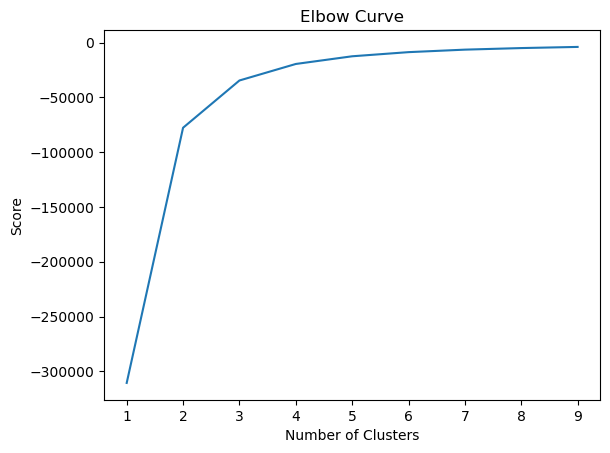

In [27]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

For my data, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [28]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [29]:
# Fit the k-means object to the data.

kmeans.fit(numerical_df_2015)

C:\Users\anaar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anaar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [30]:
numerical_df_2015['clusters'] = kmeans.fit_predict(numerical_df_2015)

C:\Users\anaar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anaar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [47]:
numerical_df_2015.tail(60)

,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity,clusters,cluster
95,96,5.041,0.524714,1.271463,0.529235,0.471567,0.146377,0.248998,0,pink
96,97,5.011,0.885416,1.340127,0.495879,0.501538,0.173380,0.474055,0,pink
97,98,5.004,0.596220,1.394239,0.553458,0.454943,0.039439,0.428580,0,pink
98,99,4.962,0.479820,1.179283,0.504131,0.440306,0.072976,0.394096,0,pink
99,100,4.955,1.027236,1.493011,0.557783,0.394144,0.032902,0.338464,0,pink
100,101,4.829,1.054699,1.384789,0.187080,0.479247,0.072509,0.139362,0,pink
101,102,4.805,1.007266,0.868351,0.613212,0.289681,0.086723,0.049693,0,pink
102,103,4.775,0.716249,1.155647,0.565667,0.254711,0.089283,0.114173,0,pink
103,104,4.735,0.989702,0.997471,0.520187,0.282110,0.114381,0.128631,0,pink
104,105,4.714,1.161459,1.434379,0.708218,0.289232,0.011052,0.113178,0,pink


In [32]:
numerical_df_2015['clusters'].value_counts()

clusters
1    53
0    52
2    50
Name: count, dtype: int64

0 = pink - middle happy countries, rank 54 to 105
1 = purple - happiest countries, top 53 in the rank
2 = dark purple - least happy countries, bottom 106 - 155

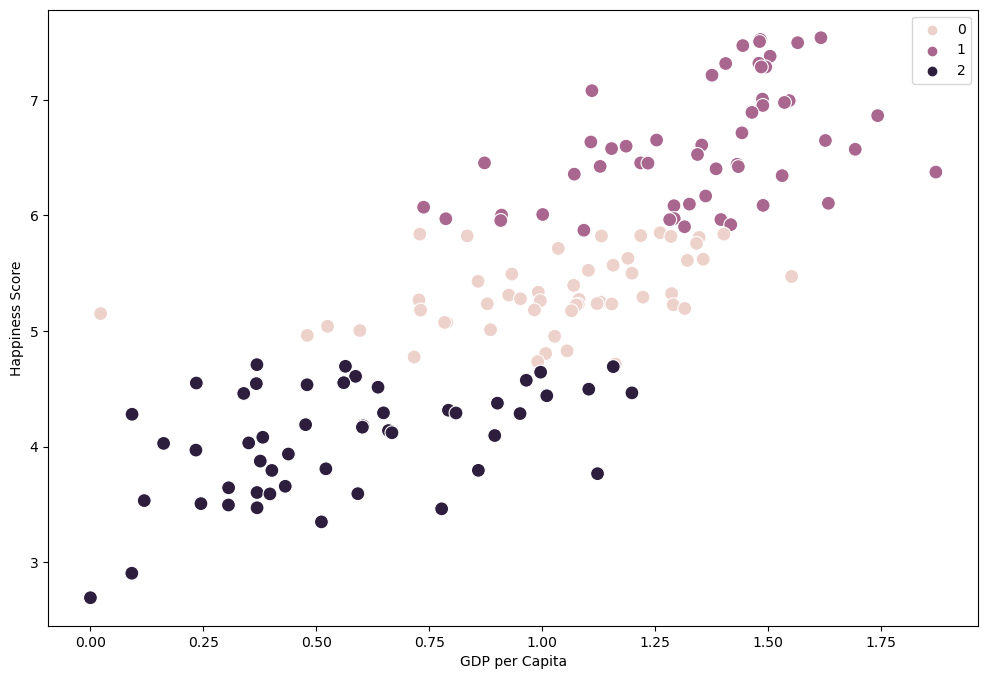

In [33]:
# Plot the clusters for the "Happiness Score" and "GDP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df_2015['GDP per Capita'], y=numerical_df_2015['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

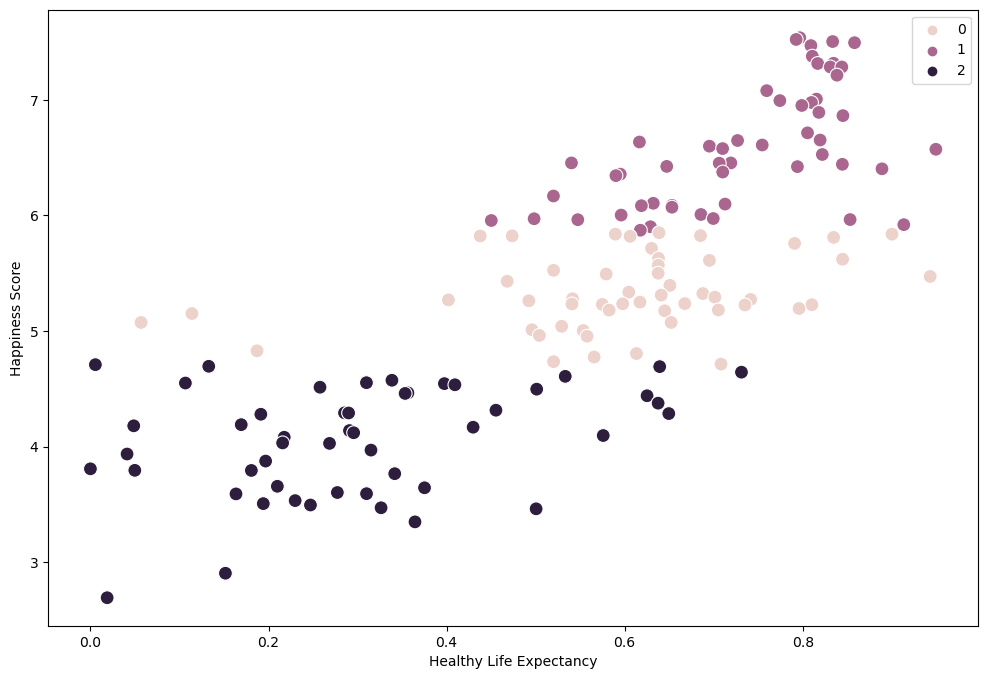

In [34]:
# Plot the clusters for the "Healthy life expectancy" and "Happiness Score" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=numerical_df_2015['Healthy Life Expectancy'], y=numerical_df_2015['Happiness Score'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness Score')
plt.show()

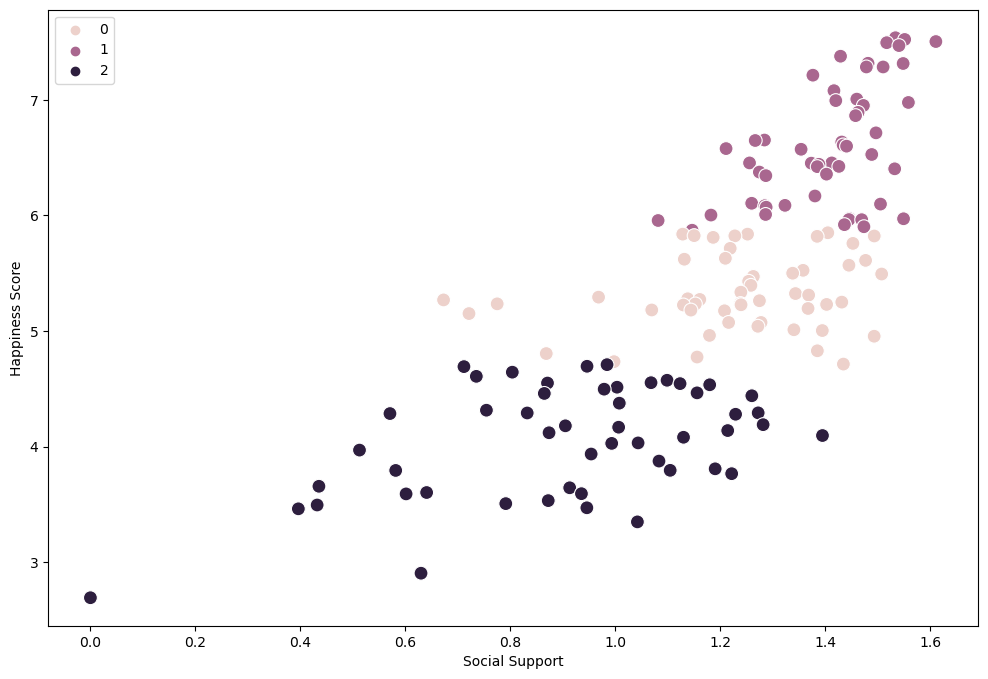

In [37]:
# Plot the clusters for the "Social Support" and "Happiness Score" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=numerical_df_2015['Social Support'], y=numerical_df_2015['Happiness Score'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()

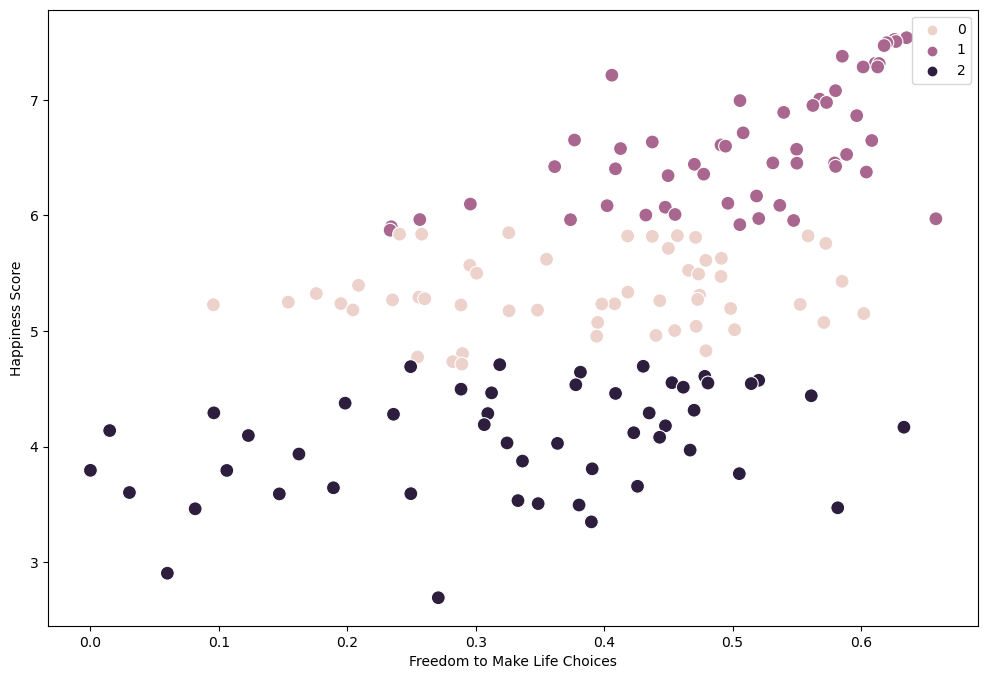

In [38]:
# Plot the clusters for the "Freedom to Make Life Choices" and "Happiness Score" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=numerical_df_2015['Freedom to Make Life Choices'], y=numerical_df_2015['Happiness Score'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

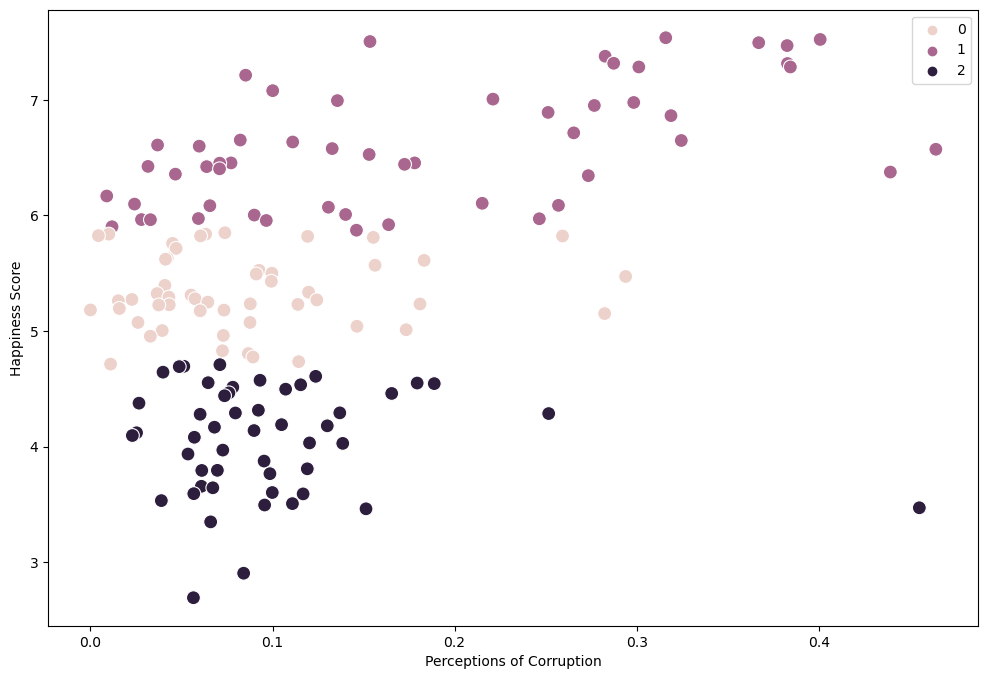

In [39]:
# Plot the clusters for the "Perceptions of Corruption	" and "Happiness Score" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=numerical_df_2015['Perceptions of Corruption'], y=numerical_df_2015['Happiness Score'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Happiness Score')
plt.show()

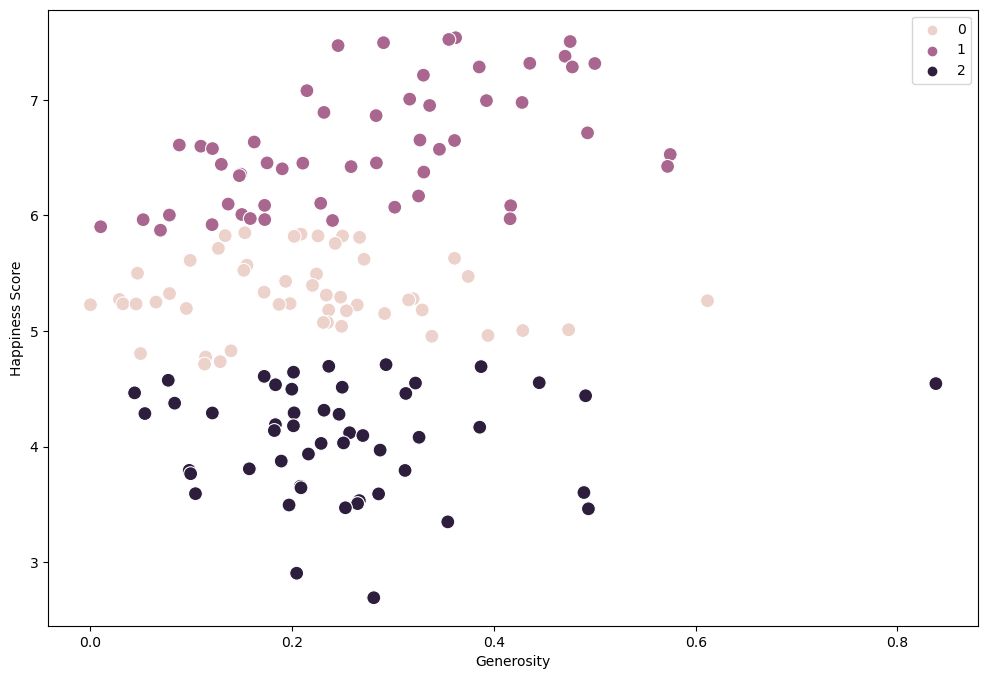

In [40]:
# Plot the clusters for the "Generosity	" and "Happiness Score" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=numerical_df_2015['Generosity'], y=numerical_df_2015['Happiness Score'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

In [41]:
#calculating the descriptive statistics from the clusters
numerical_df_2015.loc[numerical_df_2015['clusters'] == 2, 'cluster'] = 'dark purple'
numerical_df_2015.loc[numerical_df_2015['clusters'] == 1, 'cluster'] = 'purple'
numerical_df_2015.loc[numerical_df_2015['clusters'] == 0, 'cluster'] = 'pink'

In [42]:
numerical_df_2015.groupby('cluster').agg({
    'GDP per Capita':['mean', 'median'], 
    'Healthy Life Expectancy':['mean', 'median'], 
    'Social Support':['mean', 'median'],
    'Freedom to Make Life Choices':['mean', 'median'],
    'Perceptions of Corruption':['mean', 'median'],
    'Generosity':['mean', 'median'],
    'Happiness Score':['mean', 'median'],
                                         })





GDP per Capita           Healthy Life Expectancy            \
                      mean    median                    mean    median   
cluster                                                                  
dark purple       0.560318  0.516079                0.304286  0.290439   
pink              1.025987  1.066948                0.602742  0.615178   
purple            1.344606  1.395067                0.733980  0.759509   

            Social Support           Freedom to Make Life Choices            \
                      mean    median                         mean    median   
cluster                                                                       
dark purple       0.911410  0.949937                     0.330351  0.356123   
pink              1.234457  1.245620                     0.383961  0.413215   
purple            1.405980  1.431306                     0.507138  0.531311   

            Perceptions of Corruption           Generosity            \
                                 mean    median       mean    median   
cluster                                                                
dark purple                  0.098244  0.081883   0.252895  0.233918   
pink                         0.085659  0.072743   0.211805  0.214453   
purple                       0.183343  0.153066   0.275628  0.283181   

            Happiness Score          
                       mean  median  
cluster                              
dark purple        4.056040  4.1295  
pink               5.330596  5.2710  
purple             6.601509  6.5270

When using the clustering method with variables that have a positive correlation, in our case GDP (independent variable) & Happiness Score (dependent variable) or Healthy Life Expectancy & Happiness Score, we dont get much insight from the visualizations. In the exercise when we defined 3 categories using the loc function I got pretty much the same scatter plot. 

The same with the other examples where we dont have a positive correlation but still a dependent (Happiness Score) & independent (Social Support) variables. We see 3 groups well defined in by they y-achis, the Happiness Score. Dark purple dots at the bottom (least happy countries), pink in the middle (middle happy countries) & dark purple dots at the top (happiest countries). 

#### Clustering independent variables

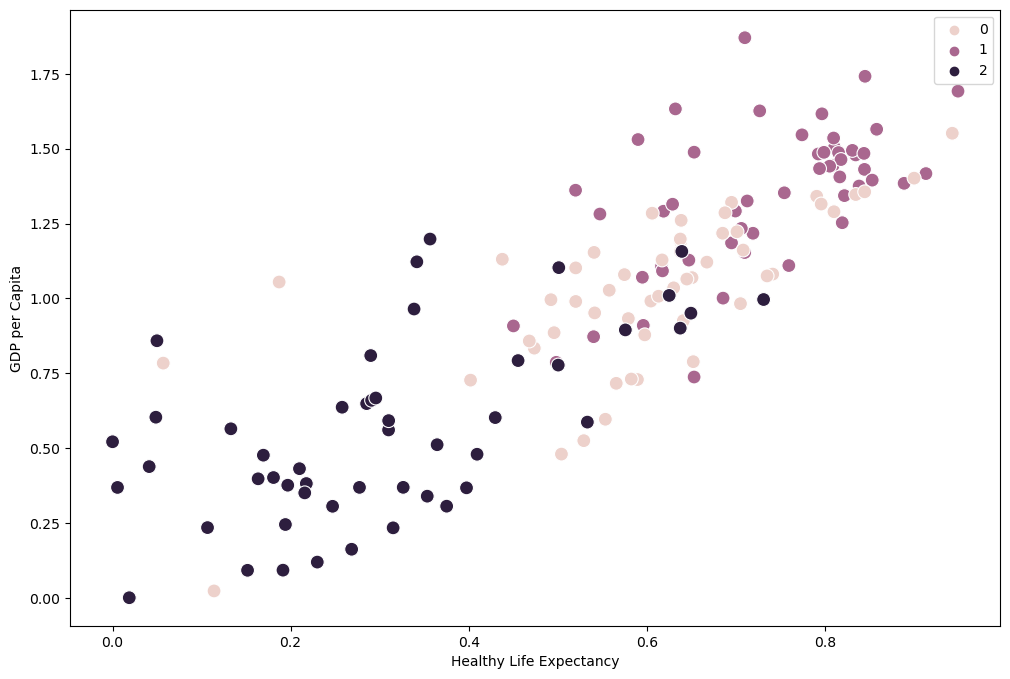

In [43]:
# Plot the clusters for the "Healthy life expectancy" and "GDP" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=numerical_df_2015['Healthy Life Expectancy'], y=numerical_df_2015['GDP per Capita'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('GDP per Capita')
plt.show()

The insight revealed using the clustering method is the following:
- Both the happiest countries (purple) and middle happy countries (pink) are clustered together. Apart from some outliers, these 2 groups are above a 0,75 GDP and 0,4 Healthy Life Expectancy. The groups are not so clearly separated as we see in the GDP vs Happiness score but the group blend and have overlaps. It is interesting to see also least happy countries (dark purple dots) mixed with the happiest countries (purple dots). This could indicate that these countries do well in GDP and Healthy Life Expectancy but other factors make them unhappy. Which goes against my initial believe that GDP and Healthy Life Expectancy were the most important factors to determine happines. 

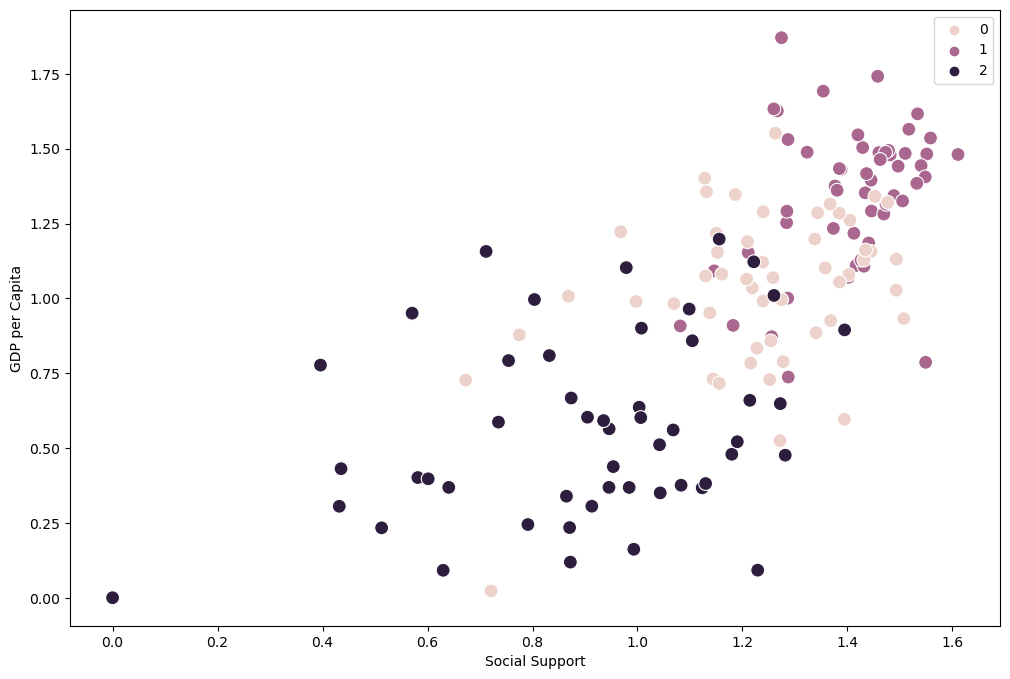

In [48]:
# Plot the clusters for the "Social Support and "GDP" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=numerical_df_2015['Social Support'], y=numerical_df_2015['GDP per Capita'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Social Support')
plt.ylabel('GDP per Capita')
plt.show()

In this scatterplot, we see the 3 groups of countries similar to the visualization before, there is a rough segmentation as the GDP grows, and so does the Social Support. There is an overlap in the groups where the least happy countries (dark purple) have a low GDP but perceive a high level of social support. 

It is important to highlight the possible bias and subjectivity of the data at this point. Social Support could have different meaning to people. For example, how did working parents answer and feel about child support as part of social support?

A single mother in a low-GDP country where there are no public daycares might need to work extra hours to have the full salary to provide for her family and would need the support of her mother or another family member to take care of the child. As her child is being taken care of, she might have answered with a high score in social support. The same would be the case for a single mother in a high-GDP country. Here there might be public daycares where she can leave her child and might even get financial support from the government, she might also have rated social support high but the situations are very different. 

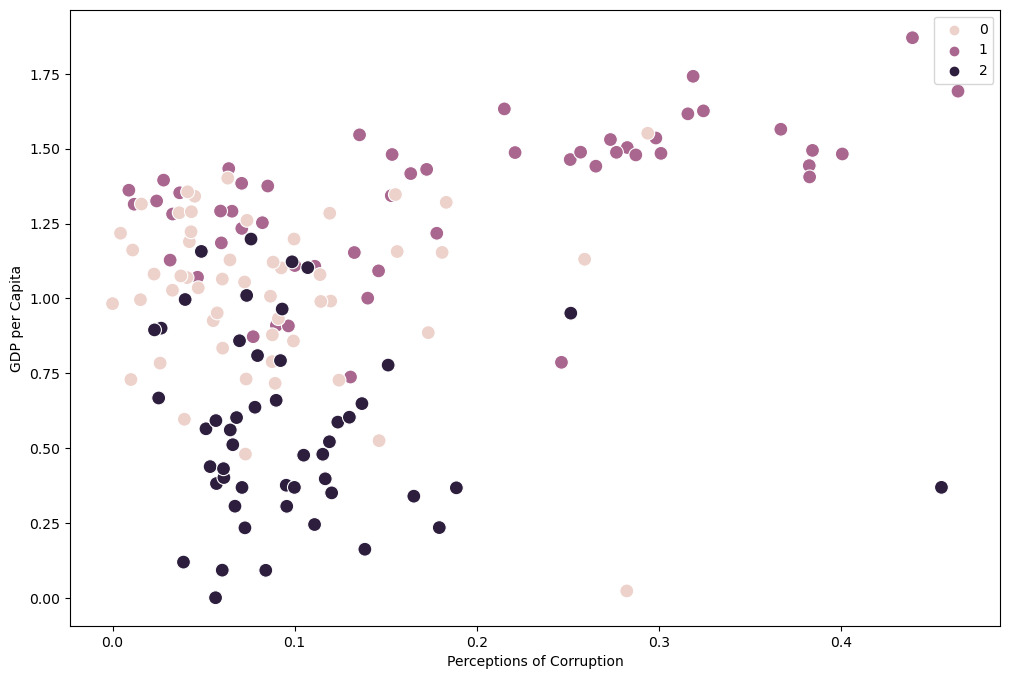

In [49]:
# Plot the clusters for the "Perceptions of Corruption and "GDP" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=numerical_df_2015['Perceptions of Corruption'], y=numerical_df_2015['GDP per Capita'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Perceptions of Corruption')
plt.ylabel('GDP per Capita')
plt.show()

Perception of corruption might be the most abstract question to answer in the survey. There are clear corruption scandals when governments or people in power get "caught" engaging in dirty business, such as embezzlement or accepting overpriced construction contracts. These scandals often make headlines in local news, drawing public attention. But what about "hidden corruption," such as giving a job position to an unqualified friend or paying bribes to police officers when caught speeding?

With this in mind, the scatterplot reveals that up to a Perception of Corruption score of 0.2, GDP varies across the three happiness groups—happiest, mid-happy, and low-happy countries. Interestingly, not all happiest countriesy purple dots) share a uniform perception of corruption; purple dots are scattered across the x-axis. Two distinct clusters emerge within the purple dots: one with a high perception of corruption and another with a low perception. This raises questions: Is perceiving corruption a privilege? Do only half of the well-off, high-GDP countries perceive corruption because they are better informed, have higher levels of education, and have greater access to independent press? Are they more aware of hidden corruption and more likely to challenge it when confronted?

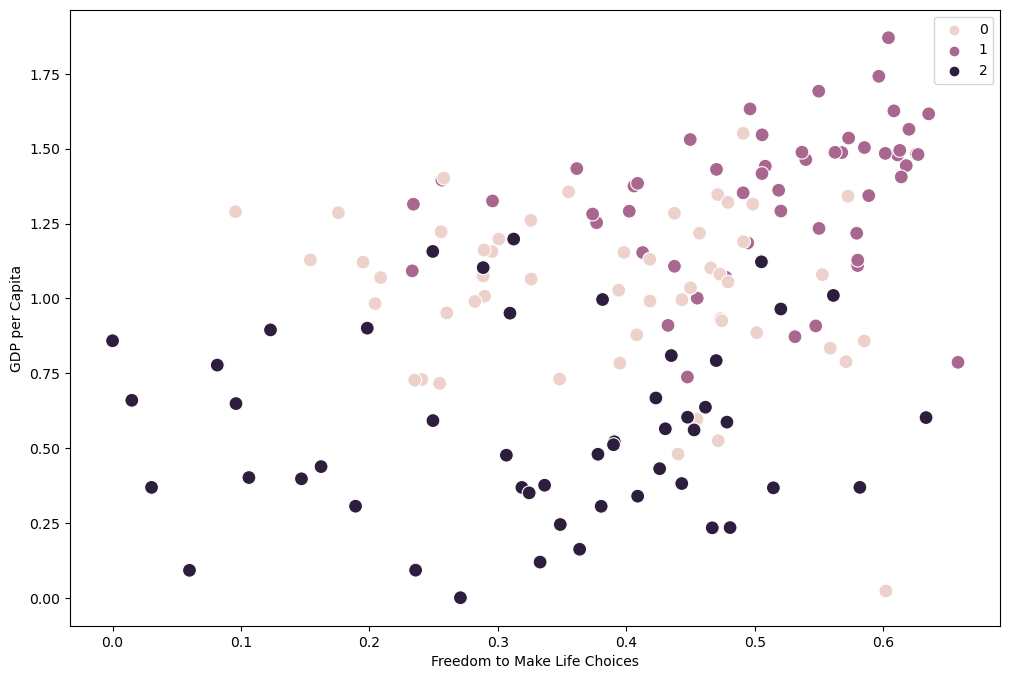

In [50]:
# Plot the clusters for the "Freedom to Make Life Choices and "GDP" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=numerical_df_2015['Freedom to Make Life Choices'], y=numerical_df_2015['GDP per Capita'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('GDP per Capita')
plt.show()

The scatterplot above also uncovers some interesting insights. It is interesting to see that the low-happy countries (dark purple) vary in how they perceive the freedom to make life choices. These are also mid to low-GDP countries, but they cluster around the middle to high-freedom factor. This goes against my initial beliefs, I thought freedom to make life choices might come with a high-GDP country, people in high-GDP countries might have more opportunities to choose a career they like, because of their higher economic state they might be able to afford or choose where they live, and choice a work that they like. 

But maybe people in low-GDP countries have less bureaucracy and therefore might find it easier to start a company, sell their products without too many regulations, and build with fewer restrictions, this could be some reasons why they rated freedom to make life choices also high. 